<a href="https://colab.research.google.com/github/ambcarvalho/challenge-TelecomX-parte2/blob/main/challenge_TelecomX_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 Extracão

**Extração do Arquivo Tratado**. Foi ultilizado o arquivo limpo e organizado da primeira parte do desafio Telecom X. Já com os dados corrigidos e padronizados.

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/ambcarvalho/challenge-TelecomX-parte2/refs/heads/main/dados_tratados.csv"
df = pd.read_csv(url)

# 🔧 Preparação dos dados

In [2]:
df.head()

,Id_cliente,Churn,Sexo,Idoso,Parceiro,Dependentes,Tempo_servico,Servico_telefone,Varias_linhas,Servico_internet,...,Protecao_dispositivo,Suporte_tecnico,Streaming_TV,Streaming_filmes,Contrato,Fatura_papel,Metodo_pagamento,Taxas_mensais,Cobranca_total,Contas_diarias
0,0002-ORFBO,0.0,0,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0.0,1,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1.0,1,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1.0,1,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1.0,0,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id_cliente            7267 non-null   object 
 1   Churn                 7043 non-null   float64
 2   Sexo                  7267 non-null   int64  
 3   Idoso                 7267 non-null   int64  
 4   Parceiro              7267 non-null   int64  
 5   Dependentes           7267 non-null   int64  
 6   Tempo_servico         7267 non-null   int64  
 7   Servico_telefone      7267 non-null   int64  
 8   Varias_linhas         7267 non-null   int64  
 9   Servico_internet      7267 non-null   object 
 10  Seguranca_online      7267 non-null   int64  
 11  Backup_online         7267 non-null   int64  
 12  Protecao_dispositivo  7267 non-null   int64  
 13  Suporte_tecnico       7267 non-null   int64  
 14  Streaming_TV          7267 non-null   int64  
 15  Streaming_filmes     

2. **Remoção de Colunas Irrelevantes**

A primeira etapa de limpeza é remover colunas que não contribuem para a análise preditiva. No contexto de telecomunicações e previsão de evasão (churn), a coluna `Id_cliente` (ou similar) geralmente é irrelevante, pois é um identificador único e não uma característica que influencia o comportamento do cliente.

In [4]:
colunas_irrelevantes = ['Id_cliente']
df = df.drop(columns=colunas_irrelevantes, errors='ignore')
df.head()

,Churn,Sexo,Idoso,Parceiro,Dependentes,Tempo_servico,Servico_telefone,Varias_linhas,Servico_internet,Seguranca_online,...,Protecao_dispositivo,Suporte_tecnico,Streaming_TV,Streaming_filmes,Contrato,Fatura_papel,Metodo_pagamento,Taxas_mensais,Cobranca_total,Contas_diarias
0,0.0,0,0,1,1,9,1,0,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0.0,1,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,1.0,1,0,0,0,4,1,0,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,1.0,1,1,1,0,13,1,0,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,1.0,0,1,1,0,3,1,0,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


3. **Encoding de Variáveis Categóricas**

Transformando as variáveis categóricas em formato numérico para torná-las compatíveis com algoritmos de machine learning. Utilizando o método de codificação `one-hot encoding`.


In [5]:
colunas_categoricas = df.select_dtypes(include=['object']).columns
print(colunas_categoricas)

Index(['Servico_internet', 'Contrato', 'Metodo_pagamento'], dtype='object')


In [6]:
df_encoded = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)
print(df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Churn                                     7043 non-null   float64
 1   Sexo                                      7267 non-null   int64  
 2   Idoso                                     7267 non-null   int64  
 3   Parceiro                                  7267 non-null   int64  
 4   Dependentes                               7267 non-null   int64  
 5   Tempo_servico                             7267 non-null   int64  
 6   Servico_telefone                          7267 non-null   int64  
 7   Varias_linhas                             7267 non-null   int64  
 8   Seguranca_online                          7267 non-null   int64  
 9   Backup_online                             7267 non-null   int64  
 10  Protecao_dispositivo                

4. **Verificação da Proporção de Evasão**

Calculando a proporção de clientes que evadiram em relação aos que permaneceram ativos. Avaliando se há desequilíbrio entre as classes, o que pode impactar modelos preditivos e a análise de resultados.



In [7]:
proporcao_evasao = df['Churn'].value_counts(normalize=True) * 100
print("Proporção de Churn (0: Não Evadiu, 1: Evadiu):")
print(proporcao_evasao.to_markdown(floatfmt=".2f", numalign="left", stralign="left"))

if proporcao_evasao.min() < 20:
    print("\nAtenção: O conjunto de dados está desbalanceado.")

Proporção de Churn (0: Não Evadiu, 1: Evadiu):
| Churn   | proportion   |
|:--------|:-------------|
| 0.00    | 73.46        |
| 1.00    | 26.54        |


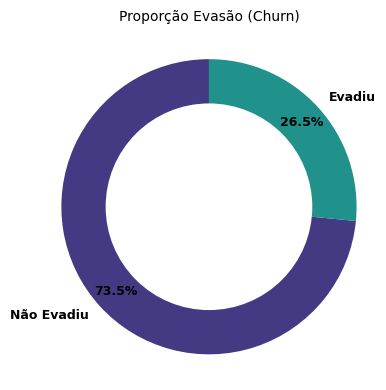

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = ['Não Evadiu', 'Evadiu']
colors = ['#443A83FF', '#21918c']
plt.figure(figsize=(4, 4))
plt.pie(proporcao_evasao,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=0.85,
        wedgeprops=dict(width=0.4),
        textprops={'fontsize': 9, 'fontweight': 'bold'})
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Proporção Evasão (Churn)', fontsize=10, pad=9)
plt.axis('equal')
plt.tight_layout()
plt.show()

5. **Normalização ou Padronização (se necessário)**
* Avaliando a necessidade de normalizar ou padronizar os dados, conforme os modelos que serão aplicados.
* Modelos baseados em distância, como **KNN, SVM, Regressão Logística e Redes Neurais**, requerem esse pré-processamento.
* Já modelos baseados em árvore, como **Decision Tree, Random Forest e XGBoost**, não são sensíveis à escala dos dados.

In [9]:
from sklearn.preprocessing import StandardScaler

colunas_numericas = ['Taxas_mensais', 'Cobranca_total']
scaler = StandardScaler()
df_encoded[colunas_numericas] = scaler.fit_transform(df_encoded[colunas_numericas])
df_encoded.head()

,Churn,Sexo,Idoso,Parceiro,Dependentes,Tempo_servico,Servico_telefone,Varias_linhas,Seguranca_online,Backup_online,...,Taxas_mensais,Cobranca_total,Contas_diarias,Servico_internet_Fiber optic,Servico_internet_No,Contrato_One year,Contrato_Two year,Metodo_pagamento_Credit card (automatic),Metodo_pagamento_Electronic check,Metodo_pagamento_Mailed check
0,0.0,0,0,1,1,9,1,0,0,1,...,0.029206,-0.742291,2.19,False,False,True,False,False,False,True
1,0.0,1,0,0,0,9,1,1,0,0,...,-0.159990,-0.764729,2.00,False,False,False,False,False,False,True
2,1.0,1,0,0,0,4,1,0,0,0,...,0.304702,-0.880026,2.46,True,False,False,False,False,True,False
3,1.0,1,1,1,0,13,1,0,0,1,...,1.104635,-0.458160,3.27,True,False,False,False,False,True,False
4,1.0,0,1,1,0,3,1,0,0,0,...,0.636624,-0.885955,2.80,True,False,False,False,False,False,True


In [10]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Churn                                     7043 non-null   float64
 1   Sexo                                      7267 non-null   int64  
 2   Idoso                                     7267 non-null   int64  
 3   Parceiro                                  7267 non-null   int64  
 4   Dependentes                               7267 non-null   int64  
 5   Tempo_servico                             7267 non-null   int64  
 6   Servico_telefone                          7267 non-null   int64  
 7   Varias_linhas                             7267 non-null   int64  
 8   Seguranca_online                          7267 non-null   int64  
 9   Backup_online                             7267 non-null   int64  
 10  Protecao_dispositivo                

# 📊 Correlação e seleção de variáveis

Com base no pré-processamento dos dados, o próximo passo é analisar a **correlação** entre as variáveis e a **seleção de variáveis** relevantes para a previsão de evasão. Isso nos ajudará a entender melhor quais fatores influenciam a decisão do cliente de sair e a construir modelos mais eficientes.

1. **Análise de Correlação**

Visualização da matriz de correlação para identificar relações entre variáveis numéricas. Observando quais variáveis apresentam **maior correlação** com a **evasão**, pois elas podem ser fortes candidatas para o modelo preditivo.

In [11]:
import numpy as np

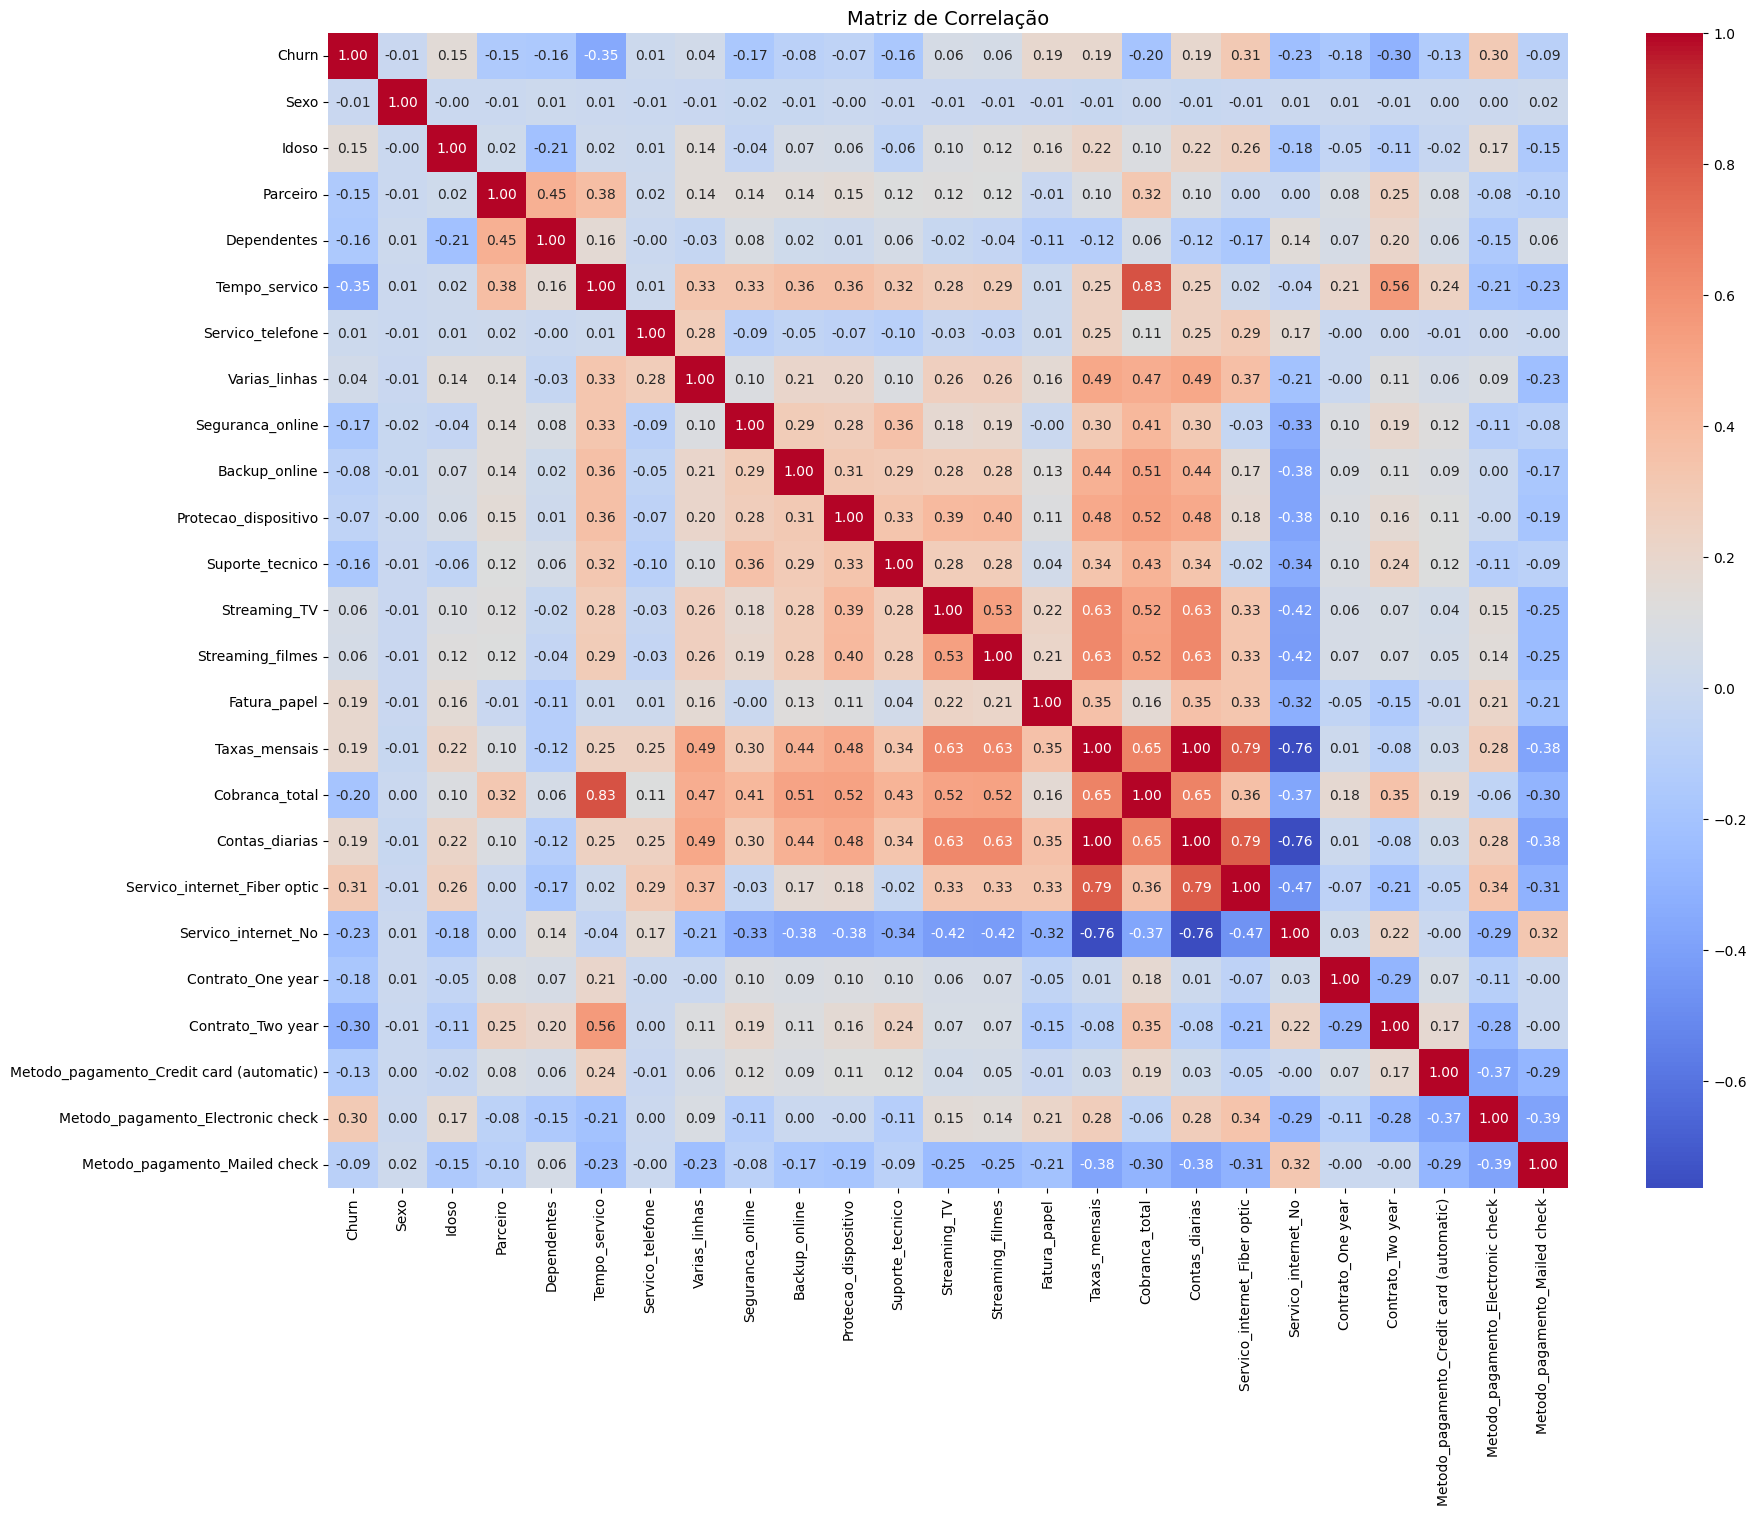

In [12]:
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação', fontsize=14)
plt.show()

In [13]:
correlation_with_churn = correlation_matrix['Churn'].sort_values(ascending=False)
print("\nCorrelação com a Evasão (Churn):")
print(correlation_with_churn.to_markdown(floatfmt=".2f", numalign="left", stralign="left"))


Correlação com a Evasão (Churn):
|                                          | Churn   |
|:-----------------------------------------|:--------|
| Churn                                    | 1.00    |
| Servico_internet_Fiber optic             | 0.31    |
| Metodo_pagamento_Electronic check        | 0.30    |
| Contas_diarias                           | 0.19    |
| Taxas_mensais                            | 0.19    |
| Fatura_papel                             | 0.19    |
| Idoso                                    | 0.15    |
| Streaming_TV                             | 0.06    |
| Streaming_filmes                         | 0.06    |
| Varias_linhas                            | 0.04    |
| Servico_telefone                         | 0.01    |
| Sexo                                     | -0.01   |
| Protecao_dispositivo                     | -0.07   |
| Backup_online                            | -0.08   |
| Metodo_pagamento_Mailed check            | -0.09   |
| Metodo_pagamento_Credit card 

**Interpretação da Matriz de Correlação:**

* Valores **próximos a 1** indicam uma forte correlação **positiva** (quando uma variável aumenta, a outra também tende a aumentar).

* Valores **próximos a -1** indicam uma forte correlação **negativa** (quando uma variável aumenta, a outra tende a diminuir).

* Valores **próximos a 0 ** indicam **pouca ou nenhuma** correlação linear.

Ao observar a correlação com a coluna `Churn`, procuramos as variáveis que têm os **maiores valores (positivos ou negativos)**, pois elas são as que mais influenciam a probabilidade de evasão.


---



2. **Análises Direcionadas**

Para entender melhor a relação entre variáveis-chave e a evasão, focaremos em **Tempo de contrato e Total gasto**

    • Tempo de contrato × Evasão
    • Total gasto × Evasão

Utilizei o gráfico `boxplots` para visualizar padrões e possíveis tendências.

☑ **Tempo de contrato (`Tempo_servico`) × Evasão (`Churn`)**



Estatísticas Não Evadiu
count    5174.000000
mean       37.569965
std        24.113777
min         0.000000
25%        15.000000
50%        38.000000
75%        61.000000
max        72.000000
Name: Tempo_servico, dtype: float64



Estatísticas Evadiu
count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: Tempo_servico, dtype: float64




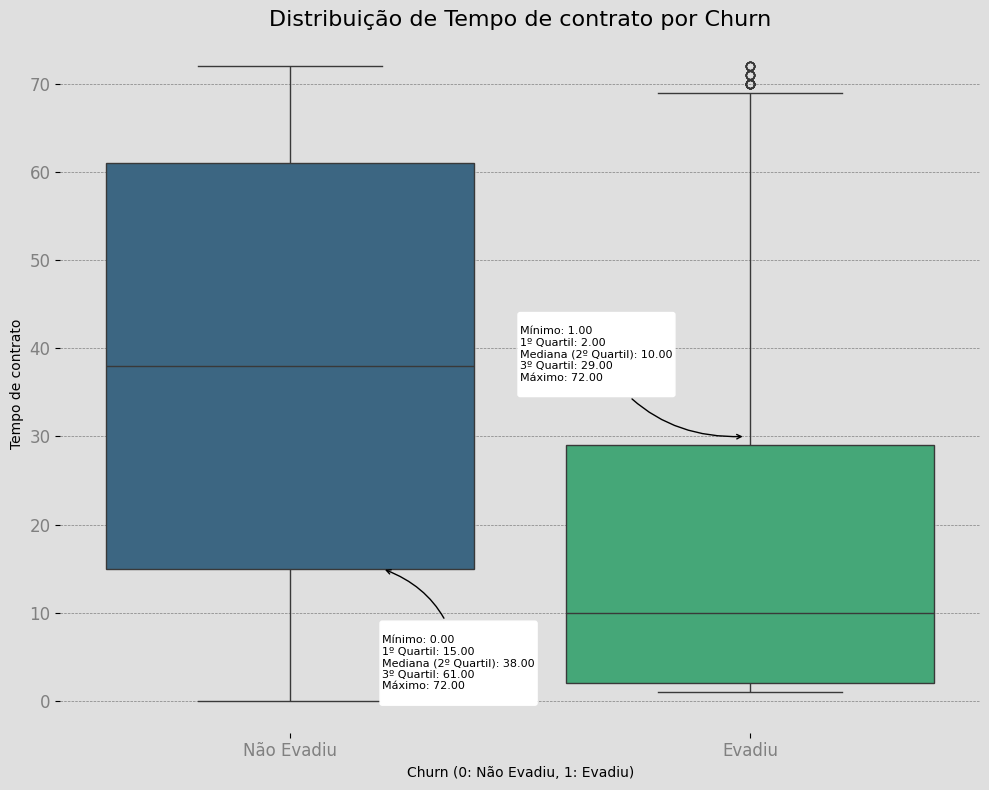

In [14]:
AZUL_1 = '#1f77b4'
BRANCO = 'white'
CINZA_3 = '#808080'
PRETO = 'black'
CINZA_1 = '#dfdfdf'

plt.figure(figsize=(10, 8), facecolor=CINZA_1)
ax = plt.axes()
ax.set_facecolor(CINZA_1)
custom_palette_binary = sns.color_palette("viridis", n_colors=2)
ax = sns.boxplot(x='Churn', y='Tempo_servico', data=df_encoded, hue='Churn', palette=custom_palette_binary, legend=False)

plt.title('Distribuição de Tempo de contrato por Churn', fontsize=16 )
plt.xlabel('Churn (0: Não Evadiu, 1: Evadiu)')
plt.ylabel('Tempo de contrato')
plt.xticks(fontsize=12, color=CINZA_3, ticks=[0, 1], labels=['Não Evadiu', 'Evadiu'])
plt.yticks(fontsize=12, color=CINZA_3)
ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)

# --- Análise Descritiva ---
stats_churn_0 = df_encoded[df_encoded['Churn'] == 0]['Tempo_servico'].describe()
stats_churn_1 = df_encoded[df_encoded['Churn'] == 1]['Tempo_servico'].describe()

print("\nEstatísticas Não Evadiu")
print (stats_churn_0)
print("\n")

print("\nEstatísticas Evadiu")
print (stats_churn_1)
print("\n")

texto_anotacao_nao_evadiu = f"""
Mínimo: {stats_churn_0['min']:.2f}
1º Quartil: {stats_churn_0['25%']:.2f}
Mediana (2º Quartil): {stats_churn_0['50%']:.2f}
3º Quartil: {stats_churn_0['75%']:.2f}
Máximo: {stats_churn_0['max']:.2f}
"""

texto_anotacao_evadiu = f"""
Mínimo: {stats_churn_1['min']:.2f}
1º Quartil: {stats_churn_1['25%']:.2f}
Mediana (2º Quartil): {stats_churn_1['50%']:.2f}
3º Quartil: {stats_churn_1['75%']:.2f}
Máximo: {stats_churn_1['max']:.2f}
"""

ax.annotate(texto_anotacao_nao_evadiu, xy=(0.2, 15), xytext=(0.2, 0), fontsize=8, color=PRETO,
            bbox=dict(boxstyle="round,pad=0.2", edgecolor=BRANCO, facecolor=BRANCO),
            arrowprops=dict(facecolor=PRETO, arrowstyle="->", connectionstyle="arc3,rad=0.3"))

ax.annotate(texto_anotacao_evadiu, xy=(0.99, 30), xytext=(0.5,35), fontsize=8, color=PRETO,
            bbox=dict(boxstyle="round,pad=0.2", edgecolor=BRANCO, facecolor=BRANCO),
            arrowprops=dict(facecolor=PRETO, arrowstyle="->", connectionstyle="arc3,rad=0.3"))

plt.tight_layout()
plt.show()

**Análise do Gráfico: "Distribuição de Tempo de contrato por Churn"**

Este boxplot compara a distribuição da variável "Tempo_servico" entre dois grupos: "Não Evadiu" (Churn = 0) e "Evadiu" (Churn = 1).

**Variáveis:**

**Eixo X (Categórico):** `Churn` (0: Não Evadiu, 1: Evadiu) - Indica se o cliente evadiu ou não.

**Eixo Y (Numérico):** `Tempo de contrato` - Representa o valor do tempo de serviço.

**Análise da Caixa "Não Evadiu" (Churn = 0 - Boxplot da Esquerda)**
As estatísticas anotadas para o grupo "Não Evadiu" são:

```
- Mínimo: 0.00
- 1º Quartil (Q1): 15.00
- Mediana (2º Quartil): 38.00
- 3º Quartil (Q3): 61.00
- Máximo: 72.00
```


Interpretação:

**Mediana (38.00)**: A metade dos clientes que **não evadiram** tem um valor de "Tempo de serviço" igual ou inferior a 38.00. Este é o valor central da distribuição para este grupo.

**Amplitude Interquartil (IQR = Q3 - Q1 = 61.00 - 15.00 = 46.00):** A faixa intermediária de 50% dos clientes que não evadiram tem "Tempo de serviço" entre 15.00 e 61.00. A dispersão dentro do corpo principal dos dados é considerável.

**Simetria/Assimetria:** A mediana (38.00) está mais próxima do 1º Quartil (15.00) do que do 3º Quartil (61.00), indicando uma leve assimetria à esquerda (cauda mais longa para valores menores), embora não seja muito pronunciada. A caixa está estendida para valores maiores.

**Dispersão:** A distribuição para clientes que não evadiram abrange um amplo espectro de valores de "Tempo de serviço", de 0.00 a 72.00, sugerindo que o volume do Tempo de serviços pode variar bastante entre esses clientes.

**Análise da Caixa "Evadiu" (Churn = 1 - Boxplot da Direita)**
As estatísticas anotadas para o grupo "Evadiu" são:

```
- Mínimo: 1.00
- 1º Quartil (Q1): 2.00
- Mediana (2º Quartil): 10.00
- 3º Quartil (Q3): 29.00
- Máximo: 72.00
```
Interpretação:

**Mediana (10.00):** A metade dos clientes que **evadiram** tem um valor de "Tempo de serviço" igual ou inferior a 10.00. Este valor é significativamente menor do que a mediana para o grupo que não evadiu (38.00 vs. 10.00).

**Amplitude Interquartil (IQR = Q3 - Q1 = 29.00 - 2.00 = 27.00):** A faixa intermediária de 50% dos clientes que evadiram tem "Tempo de serviço" entre 2.00 e 29.00. A dispersão dentro do corpo principal dos dados é menor em comparação ao grupo "Não Evadiu".

**Simetria/Assimetria:** A mediana (10.00) está mais próxima do 1º Quartil (2.00) do que do 3º Quartil (29.00), indicando uma assimetria à esquerda mais pronunciada.

**Outliers:** Há pontos (círculos) acima do "bigode" superior da caixa "Evadiu". Estes são os outliers, que representam clientes que evadiram, mas tiveram um volume de "Tempo de serviço" excepcionalmente alto em comparação com a maioria dos clientes que evadiram. Isso sugere que, embora a maioria dos clientes que evadem tenha Tempo de serviço baixas, alguns poucos podem ter valores altos.

**Conclusão e Insights Gerais**
A principal conclusão a partir deste gráfico é que há uma **diferença notável na distribuição de "Contas Diárias" entre clientes que evadem e clientes que não evadem.**

* **Clientes que não evadem** tendem a ter um volume de "Tempo de serviço" significativamente maior, com uma mediana de 38.00. Sua distribuição é mais ampla e inclinada para valores mais altos.

* **Clientes que evadem** tendem a ter um volume de "Tempo de serviço" muito menor, com uma mediana de 10.00. A maior parte dos clientes que evadem concentra-se em valores baixos de Tempo de serviço.

☑ **Total Gasto (`Cobranca_total`) vs. Evasão (`Churn`)**


Estatísticas Não Evadiu
count    5174.000000
mean        0.120225
std         1.027094
min        -1.003831
25%        -0.751284
50%        -0.263460
75%         0.875325
max         2.819171
Name: Cobranca_total, dtype: float64



Estatísticas Evadiu
count    1869.000000
mean       -0.328582
std         0.833515
min        -0.995521
25%        -0.944540
50%        -0.693691
75%         0.023856
max         2.824615
Name: Cobranca_total, dtype: float64




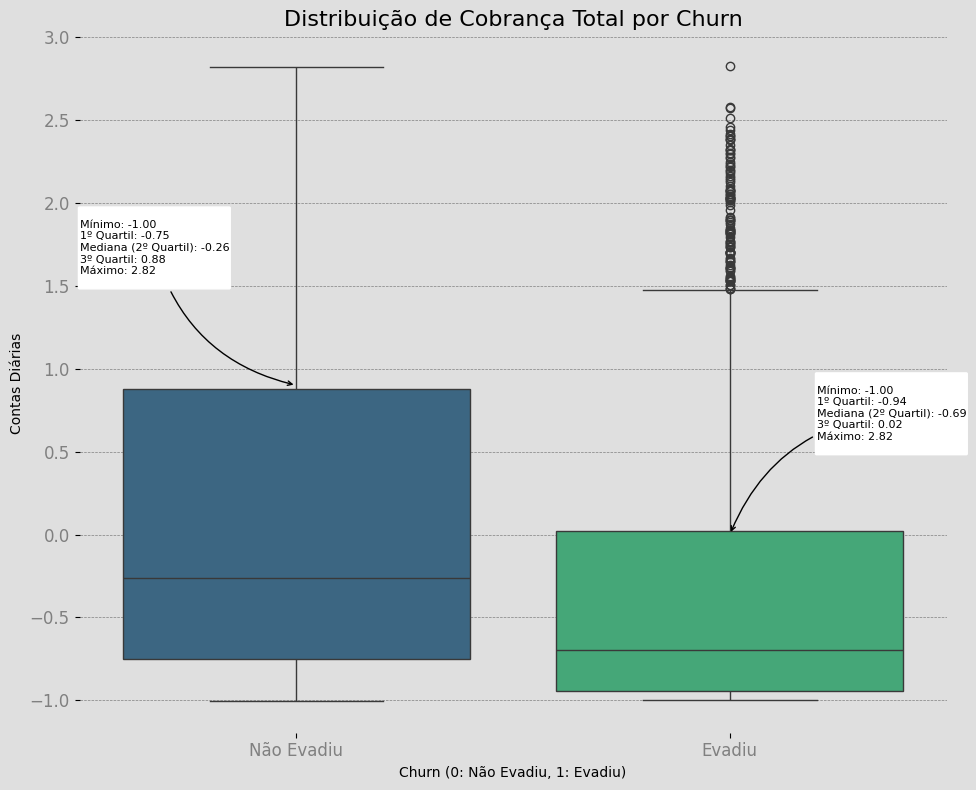

In [15]:
AZUL_1 = '#1f77b4'
BRANCO = 'white'
CINZA_3 = '#808080'
PRETO = 'black'
CINZA_1 = '#dfdfdf'

plt.figure(figsize=(10, 8), facecolor=CINZA_1)
ax = plt.axes()
ax.set_facecolor(CINZA_1)
custom_palette_binary = sns.color_palette("viridis", n_colors=2)
ax = sns.boxplot(x='Churn', y='Cobranca_total', data=df_encoded, hue='Churn', palette=custom_palette_binary, legend=False)

plt.title('Distribuição de Cobrança Total por Churn', fontsize=16 )
plt.xlabel('Churn (0: Não Evadiu, 1: Evadiu)')
plt.ylabel('Contas Diárias')
plt.xticks(fontsize=12, color=CINZA_3, ticks=[0, 1], labels=['Não Evadiu', 'Evadiu'])
plt.yticks(fontsize=12, color=CINZA_3)
ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)

# --- Análise Descritiva ---
stats_churn_0 = df_encoded[df_encoded['Churn'] == 0]['Cobranca_total'].describe()
stats_churn_1 = df_encoded[df_encoded['Churn'] == 1]['Cobranca_total'].describe()

print("\nEstatísticas Não Evadiu")
print (stats_churn_0)
print("\n")

print("\nEstatísticas Evadiu")
print (stats_churn_1)
print("\n")

texto_anotacao_nao_evadiu = f"""
Mínimo: {stats_churn_0['min']:.2f}
1º Quartil: {stats_churn_0['25%']:.2f}
Mediana (2º Quartil): {stats_churn_0['50%']:.2f}
3º Quartil: {stats_churn_0['75%']:.2f}
Máximo: {stats_churn_0['max']:.2f}
"""

texto_anotacao_evadiu = f"""
Mínimo: {stats_churn_1['min']:.2f}
1º Quartil: {stats_churn_1['25%']:.2f}
Mediana (2º Quartil): {stats_churn_1['50%']:.2f}
3º Quartil: {stats_churn_1['75%']:.2f}
Máximo: {stats_churn_1['max']:.2f}
"""

ax.annotate(texto_anotacao_nao_evadiu, xy=(0, 0.9), xytext=(-0.5, 1.5), fontsize=8, color=PRETO,
            bbox=dict(boxstyle="round,pad=0.1", edgecolor=BRANCO, facecolor=BRANCO),
            arrowprops=dict(facecolor=PRETO, arrowstyle="->", connectionstyle="arc3,rad=0.3"))

ax.annotate(texto_anotacao_evadiu, xy=(1, 0), xytext=(1.2, 0.5), fontsize=8, color=PRETO,
            bbox=dict(boxstyle="round,pad=0.1", edgecolor=BRANCO, facecolor=BRANCO),
            arrowprops=dict(facecolor=PRETO, arrowstyle="->", connectionstyle="arc3,rad=0.3"))

plt.tight_layout()
plt.show()


**Análise do Gráfico: "Distribuição de Cobrança Total por Churn"**

Este boxplot, compara a distribuição da variável `"Cobrança_Total"` entre dois grupos: "Não Evadiu" (Churn = 0) e "Evadiu" (Churn = 1).

Variáveis:

**Eixo X (Categórico):** `Churn` (0: Não Evadiu, 1: Evadiu)

**Eixo Y (Numérico):** `CObranca_total` (escaladas)

**Análise da Caixa "Não Evadiu" (Churn = 0 - Boxplot da Esquerda)**
As estatísticas anotadas para o grupo "Não Evadiu" são:

```
- Mínimo: -1.00
- 1º Quartil (Q1): -0.75
- Mediana (2º Quartil): -0.26
- 3º Quartil (Q3): 0.99
- Máximo: 2.82

```

**Interpretação:**

**Mediana (-0.26):** A metade dos clientes que **não evadiram** tem um valor de "cobrança total" escaladas igual ou inferior a -0.26.

**Amplitude Interquartil (IQR = Q3 - Q1 = 0.99 - (-0.75) = 1.74):** A faixa intermediária de 50% dos clientes que não evadiram tem "cobrança total" escaladas entre -0.75 e 0.99.

**Simetria/Assimetria:** A mediana (-0.26) está mais próxima do 1º Quartil (-0.75) do que do 3º Quartil (0.99), indicando uma leve assimetria à esquerda (cauda mais longa para valores menores), semelhante ao gráfico anterior.

**Dispersão:** A distribuição para este grupo ainda mostra uma gama considerável de valores, variando de -1.00 a 2.82.

Análise da Caixa "Evadiu" (Churn = 1 - Boxplot da Direita)
As estatísticas anotadas para o grupo "Evadiu" são:
```
- Mínimo: -1.00
- 1º Quartil (Q1): -0.94
- Mediana (2º Quartil): -0.69
- 3º Quartil (Q3): 0.02
- Máximo: 2.82
```
**Interpretação:**

**Mediana (-0.69):** A metade dos clientes que **evadiram** tem um valor de "Cobrança Total" escaladas igual ou inferior a -0.69. Este valor é notavelmente menor do que a mediana para o grupo que não evadiu (-0.26 vs. -0.69).

**Amplitude Interquartil (IQR = Q3 - Q1 = 0.02 - (-0.94) = 0.96):** A faixa intermediária de 50% dos clientes que evadiram tem "Cobrança Total" escaladas entre -0.94 e 0.02. A dispersão do corpo principal dos dados é menor em comparação ao grupo "Não Evadiu", e concentrada em valores mais baixos.

**Simetria/Assimetria:** A mediana (-0.69) está visivelmente mais próxima do 1º Quartil (-0.94) do que do 3º Quartil (0.02), indicando uma assimetria à esquerda mais pronunciada.

**Outliers:** Assim como no gráfico anterior (tempo de contrato), há uma grande quantidade de pontos (círculos) acima do "bigode" superior da caixa "Evadiu". Estes são os outliers, que representam clientes que evadiram, mas tiveram um volume de "Cobrança Total" excepcionalmente alto (em sua escala), mesmo que a maioria dos clientes que evadem tenha valores baixos.

**Conclusão e Insights Gerais**
A análise deste gráfico reforça as conclusões do gráfico anterior (Tempo de contrato), mesmo com os dados escalados:

* **Diferença Significativa:** Há uma diferença clara e consistente na distribuição de "Cobrança Total" (escaladas) entre clientes que evadem e clientes que não evadem.

* **Clientes que Não Evadem:** Tendem a ter valores de "Cobrança Total" **maiores** (mediana de -0.26).

* **Clientes que Evadem:** Tendem a ter valores de "Cobrança Total" **menores** (mediana de -0.69). A maior parte desses clientes se concentra em valores escalados mais baixos.

* **Outliers no "Evadiu":** A presença persistente de outliers com altos valores de "Cobrança Total" no grupo "Evadiu" é um ponto importante. Isso sugere que, embora o padrão geral de evasão esteja associado a baixas contas, existem exceções significativas que podem indicar outros fatores de churn para esse subgrupo.

#📊 Modelagem preditiva

1. **Separação de Dados**

Primeiro, precisamos dividir o conjunto de dados em conjuntos de treino e teste. O conjunto de treino será usado para ensinar o modelo, e o conjunto de teste, para avaliar seu desempenho em dados que ele não viu. Uma divisão de 80% treino e 20% teste é uma boa prática comum.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
#Removendo linhas com informação de NaN
df_encoded = df_encoded.dropna(subset=['Churn'])

In [18]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Dividindo os dados em treino e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Verificando se há valores ausentes em y_train
print(y_train.isnull().sum())

# Verificando se há NaNs na variável alvo antes da divisão
print(df_encoded['Churn'].isnull().sum())

0
0


In [20]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Churn                                     7043 non-null   float64
 1   Sexo                                      7043 non-null   int64  
 2   Idoso                                     7043 non-null   int64  
 3   Parceiro                                  7043 non-null   int64  
 4   Dependentes                               7043 non-null   int64  
 5   Tempo_servico                             7043 non-null   int64  
 6   Servico_telefone                          7043 non-null   int64  
 7   Varias_linhas                             7043 non-null   int64  
 8   Seguranca_online                          7043 non-null   int64  
 9   Backup_online                             7043 non-null   int64  
 10  Protecao_dispositivo                     

2.  **Criação de Modelos**

Vamos criar dois modelos diferentes:

1. **Regressão Logística:** Exige normalização (pois é baseada em distância e a escala dos dados afeta os pesos).

2. **Random Forest:** Não exige normalização (é baseado em árvores e opera por divisões de dados, não por distâncias).

**Modelo 1: Regressão Logística**

A **Regressão Logística** é um algoritmo robusto e rápido, amplamente usado para classificação binária (como previsão de churn).

In [21]:
from sklearn.linear_model import LogisticRegression

# Treinando a Regressão Logística com dados normalizados
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

# Previsões
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Previsões de probabilidade (necessário para ROC e Precision-Recall)
# y_proba_logistic[:, 1] pega a probabilidade da classe positiva (1)
y_proba_logistic = logistic_model.predict_proba(X_test_scaled)[:, 1]

**Modelo 2: Random Forest**

**Random Forest** é um algoritmo baseado em árvores de decisão. Ele é menos sensível a outliers e não requer normalização, além de ser eficaz em conjuntos de dados complexos.

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Treinando o Random Forest sem normalização (usando X_train e X_test originais)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Previsões
y_pred_rf = rf_model.predict(X_test)

3. **Avaliação dos Modelos**

Vamos avaliar ambos os modelos usando as métricas padrão de classificação: **Acurácia, Precisão, Recall, F1-score e a Matriz de Confusão.**

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluate_model(y_test, y_pred, model_name):
    print(f"--- Avaliação do Modelo: {model_name} ---")
    print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precisão: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_test, y_pred):.4f}")
    print("\nMatriz de Confusão:")
    print(confusion_matrix(y_test, y_pred))
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))
    print("-" * 40)

# Avaliando a Regressão Logística
evaluate_model(y_test, y_pred_logistic, "Regressão Logística")

# Avaliando Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest")

--- Avaliação do Modelo: Regressão Logística ---
Acurácia: 0.8062
Precisão: 0.6667
Recall: 0.5362
F1-score: 0.5944

Matriz de Confusão:
[[936 100]
 [173 200]]

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1036
         1.0       0.67      0.54      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409

----------------------------------------
--- Avaliação do Modelo: Random Forest ---
Acurácia: 0.7956
Precisão: 0.6580
Recall: 0.4745
F1-score: 0.5514

Matriz de Confusão:
[[944  92]
 [196 177]]

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      1036
         1.0       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71 

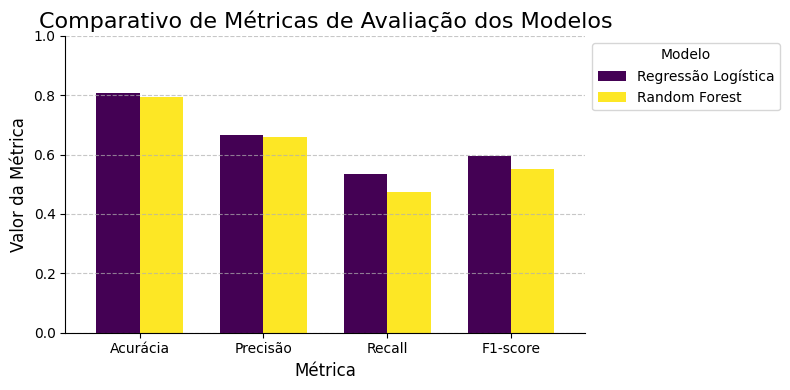

In [24]:
metrics_data = {
    "Regressão Logística": {
        "Acurácia": 0.8062,
        "Precisão": 0.6667,
        "Recall": 0.5362,
        "F1-score": 0.5944
    },
    "Random Forest": {
        "Acurácia": 0.7956,
        "Precisão": 0.6580,
        "Recall": 0.4745,
        "F1-score": 0.5514
    }
}

df_metrics = pd.DataFrame(metrics_data)
fig, ax = plt.subplots(figsize=(8, 4))
df_metrics.plot(kind='bar', ax=ax, width=0.7, colormap='viridis')
ax.set_title('Comparativo de Métricas de Avaliação dos Modelos', fontsize=16)
ax.set_ylabel('Valor da Métrica', fontsize=12)
ax.set_xlabel('Métrica', fontsize=12)
ax.set_ylim(0, 1)
ax.tick_params(axis='x', rotation=0)
ax.legend(title='Modelo', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
sns.despine()
plt.show()

**Relatório de Classificação: Regressão Logística**

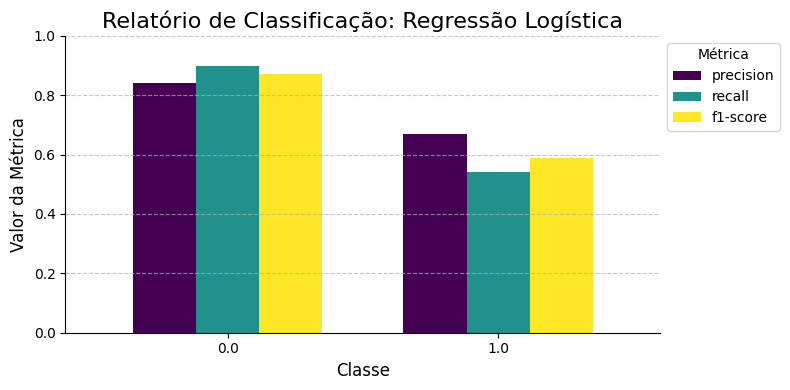

In [25]:
logistic_report = {
    "precision": {"0.0": 0.84, "1.0": 0.67},
    "recall": {"0.0": 0.90, "1.0": 0.54},
    "f1-score": {"0.0": 0.87, "1.0": 0.59},
    "support": {"0.0": 1036, "1.0": 373}
}

df_logistic_report = pd.DataFrame(logistic_report).drop(columns=['support'])

fig, ax = plt.subplots(figsize=(8, 4))
df_logistic_report.plot(kind='bar', ax=ax, width=0.7, colormap='viridis')
ax.set_title('Relatório de Classificação: Regressão Logística', fontsize=16)
ax.set_ylabel('Valor da Métrica', fontsize=12)
ax.set_xlabel('Classe', fontsize=12)
ax.set_ylim(0, 1)
ax.tick_params(axis='x', rotation=0)
ax.legend(title='Métrica', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
sns.despine()
plt.show()

**Relatório de Classificação: Random Forest**

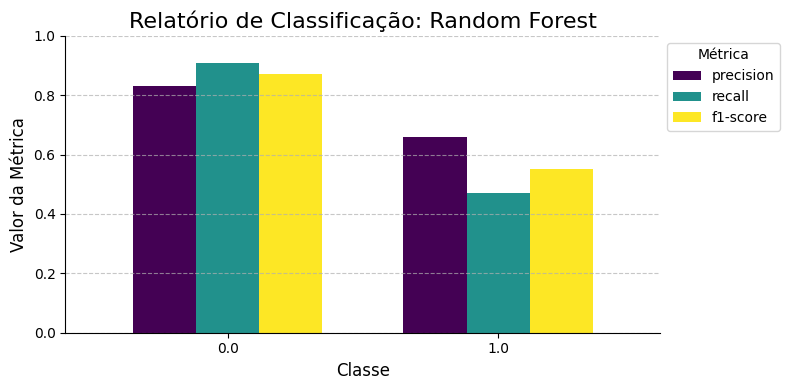

In [26]:
# Dados do relatório de classificação do Random Forest
rf_report = {
    "precision": {"0.0": 0.83, "1.0": 0.66},
    "recall": {"0.0": 0.91, "1.0": 0.47},
    "f1-score": {"0.0": 0.87, "1.0": 0.55},
    "support": {"0.0": 1036, "1.0": 373}
}

df_rf_report = pd.DataFrame(rf_report).drop(columns=['support'])

fig, ax = plt.subplots(figsize=(8, 4))
df_rf_report.plot(kind='bar', ax=ax, width=0.7, colormap='viridis')
ax.set_title('Relatório de Classificação: Random Forest', fontsize=16)
ax.set_ylabel('Valor da Métrica', fontsize=12)
ax.set_xlabel('Classe', fontsize=12)
ax.set_ylim(0, 1)
ax.tick_params(axis='x', rotation=0)
ax.legend(title='Métrica', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
sns.despine()
plt.show()

<Figure size 400x400 with 0 Axes>

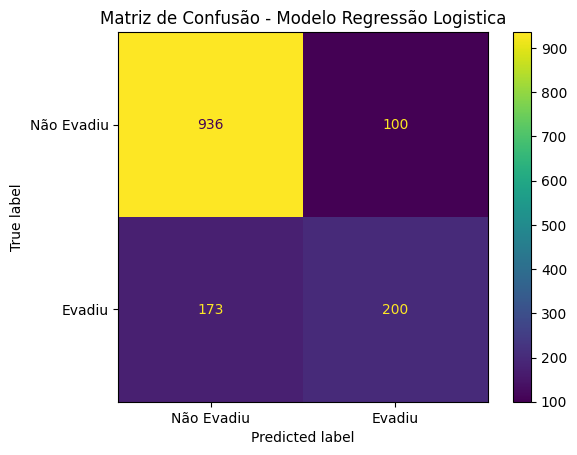

In [27]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

plt.figure(figsize=(4, 4))
cm = confusion_matrix(y_test, y_pred_logistic)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Não Evadiu', 'Evadiu'])
disp.plot(cmap='viridis', values_format='d')
plt.title('Matriz de Confusão - Modelo Regressão Logistica')
plt.grid(False)
plt.show()

<Figure size 400x400 with 0 Axes>

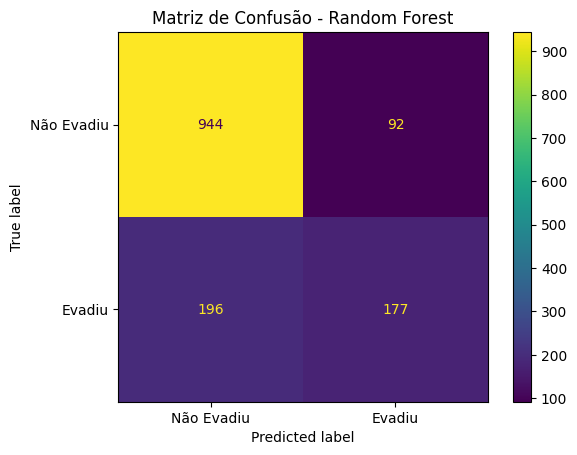

In [28]:
plt.figure(figsize=(4, 4))
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Não Evadiu', 'Evadiu'])
disp.plot(cmap='viridis', values_format='d')
plt.title('Matriz de Confusão - Random Forest')
plt.grid(False)
plt.show()

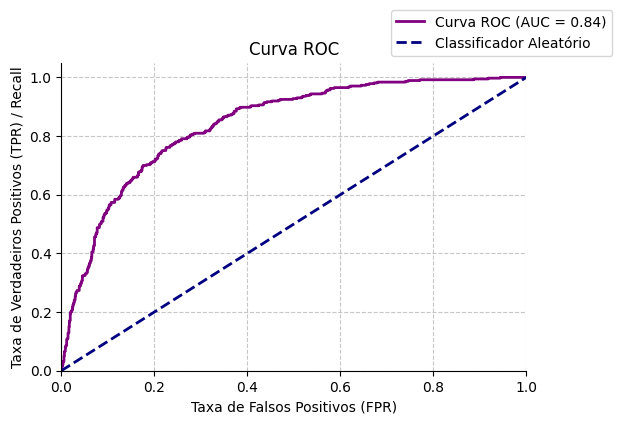

In [29]:
# 2. Curva ROC e AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_logistic)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='purple', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Classificador Aleatório')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR) / Recall')
plt.title('Curva ROC')
plt.legend(bbox_to_anchor=(1.2, 1), loc="lower right")
plt.grid(True, linestyle='--', alpha=0.7)
sns.despine()
plt.show()

O gráfico mostra que o modelo tem uma capacidade de discriminação boa, conseguindo diferenciar bem entre as classes positiva e negativa. O valor de AUC = 0.84 confirma isso, mostrando que a performance do modelo é sólida.

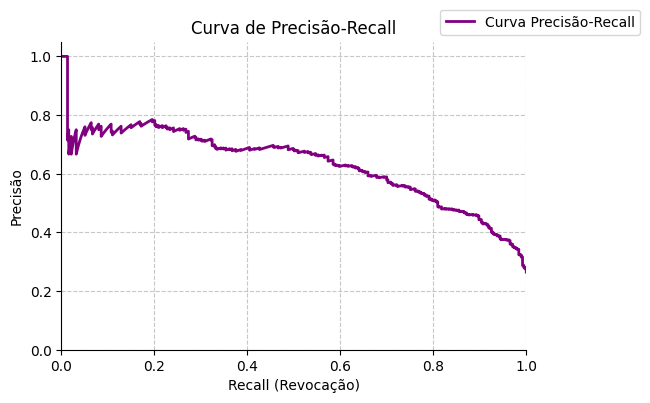

In [30]:
# 3. Curva de Precisão-Recall
precision, recall, _ = precision_recall_curve(y_test, y_proba_logistic)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='purple', lw=2, label='Curva Precisão-Recall')
plt.xlabel('Recall (Revocação)')
plt.ylabel('Precisão')
plt.title('Curva de Precisão-Recall')
plt.legend(bbox_to_anchor=(0.8, 1), loc="lower left")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True, linestyle='--', alpha=0.7)
sns.despine()
plt.show()

**Análise crítica comparativa**

**1. Qual modelo teve o melhor desempenho?**

Comparando as principais métricas para a classe 1 (Evadiu).


|Métrica	|Reg. Log. |Random Forest  |
|-------- |--------- |-------------- |
|Acurácia |  0.8062  | 0.7956        |
|Precisão |  0.6667  | 0.6580        |
|Recall	  |  0.5362  | 0.4745        |
|F1-score |  0.5944  | 0.5514        |



✅ Conclusão:

A **Regressão Logística** apresentou desempenho superior em todas as métricas para a classe minoritária (Evadiu), especialmente no Recall, que mede a capacidade de identificar corretamente os clientes que vão evadir.

Isso é crítico em casos de churn, onde é preferível errar por excesso (falsos positivos) do que por omissão (falsos negativos).


2. **Algum modelo apresentou overfitting ou underfitting?**

▶ **Regressão Logística**
* Bom equilíbrio entre precisão (0.67) e recall (0.54), com F1-score razoável (0.59).

* A diferença entre as métricas das duas classes não é extrema.

* Não há sinais claros de **overfitting** ou **underfitting**.

* Modelo simples e interpretável, ideal para dados com relações lineares.

**Conclusão:** Modelo bem ajustado.


▶ **Random Forest**

* Embora seja um modelo mais complexo, seu desempenho é ligeiramente inferior em todas as métricas.

* Recall da classe "Evadiu" caiu para 0.47, o que indica que o modelo não está captando bem os padrões da classe minoritária.

* Pode ser um caso de leve underfitting, o que é contraintuitivo para Random Forest — que costuma tender ao overfitting se mal regulado.

**Conclusão:** Possível **underfitting** leve — o modelo não está aproveitando todo seu potencial.

✅ **Conclusão Geral**

* A **Regressão Logística** é o modelo mais indicado com base nas métricas apresentadas: melhor desempenho, mais interpretável, e sem sinais de overfitting ou underfitting.
* O **Random Forest,** embora potencialmente mais poderoso, está subutilizado — provavelmente por falta de ajustes nos parâmetros ou balanceamento de classes. Com melhorias, pode se tornar competitivo ou até superior.

# 📉 Interpretação e conclusões

1. **Análise de Importância das Variáveis**

Após escolher os modelos, realize a análise das variáveis mais relevantes para a previsão de evasão:
* Re**gressão Logística:** investigue os **coeficientes** das variáveis, que mostram sua contribuição para a previsão de evasão.

In [31]:
# Coeficientes da Regressão Logística
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': logistic_model.coef_[0]})
coefficients['Absolute_Coefficient'] = abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values(by='Absolute_Coefficient', ascending=False)

print("--- Coeficientes da Regressão Logística (Maiores impactos na evasão) ---")
print(coefficients.head(24).to_string(index=False))
print("-" * 70)

--- Coeficientes da Regressão Logística (Maiores impactos na evasão) ---
                                 Feature  Coefficient  Absolute_Coefficient
                           Tempo_servico    -1.431594              1.431594
                          Cobranca_total     0.690848              0.690848
                       Contrato_Two year    -0.646547              0.646547
            Servico_internet_Fiber optic     0.558005              0.558005
                     Servico_internet_No    -0.462619              0.462619
                       Contrato_One year    -0.292323              0.292323
                           Taxas_mensais    -0.259757              0.259757
                          Contas_diarias    -0.187013              0.187013
                            Streaming_TV     0.181739              0.181739
                           Varias_linhas     0.174945              0.174945
       Metodo_pagamento_Electronic check     0.165310              0.165310
               

/tmp/ipython-input-2381155778.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')


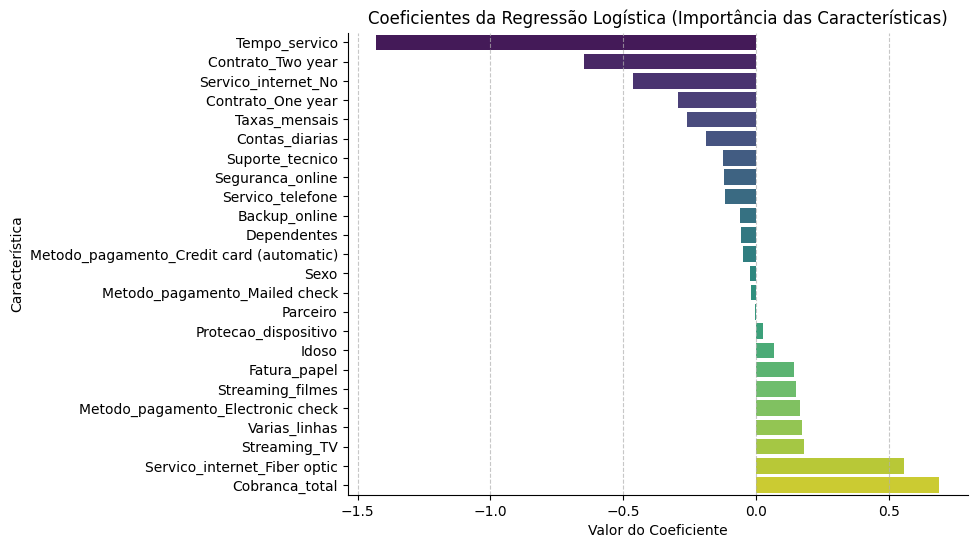

In [32]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': logistic_model.coef_[0]})
coefficients['Absolute_Coefficient'] = abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', ascending=True)

plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')
plt.title('Coeficientes da Regressão Logística (Importância das Características)')
plt.xlabel('Valor do Coeficiente')
plt.ylabel('Característica')
plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine()
plt.show()

✅ **Interpretação dos Coeficientes:**

S**inal:** Um coeficiente positivo indica que, quanto maior o valor da feature, maior a probabilidade de churn. Um coeficiente negativo indica o oposto.

**Magnitude:** A magnitude (valor absoluto) do coeficiente reflete a força da influência da feature na probabilidade de churn. Coeficientes com valores absolutos maiores são mais importantes.

---

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Treinar o modelo Random Forest (sem normalização, como já feito)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Importância das variáveis do Random Forest
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print("--- Importância das Variáveis do Random Forest (Maiores impactos na evasão) ---")
print(feature_importances.head(24).to_string(index=False))
print("-" * 70)

--- Importância das Variáveis do Random Forest (Maiores impactos na evasão) ---
                                 Feature  Importance
                          Cobranca_total    0.172899
                           Tempo_servico    0.150137
                           Taxas_mensais    0.135572
                          Contas_diarias    0.122270
            Servico_internet_Fiber optic    0.043272
       Metodo_pagamento_Electronic check    0.040483
                       Contrato_Two year    0.036269
                                    Sexo    0.024989
                            Fatura_papel    0.024645
                       Contrato_One year    0.023695
                         Suporte_tecnico    0.021932
                                Parceiro    0.021523
                        Seguranca_online    0.020614
                           Backup_online    0.018991
                                   Idoso    0.018928
                             Dependentes    0.018327
                   

•	**Random Forest:** Utilize a importância das variáveis fornecida pelo modelo. O Random Forest calcula a importância com base em como cada variável contribui para a redução da impureza durante as divisões das árvores

/tmp/ipython-input-2557146959.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


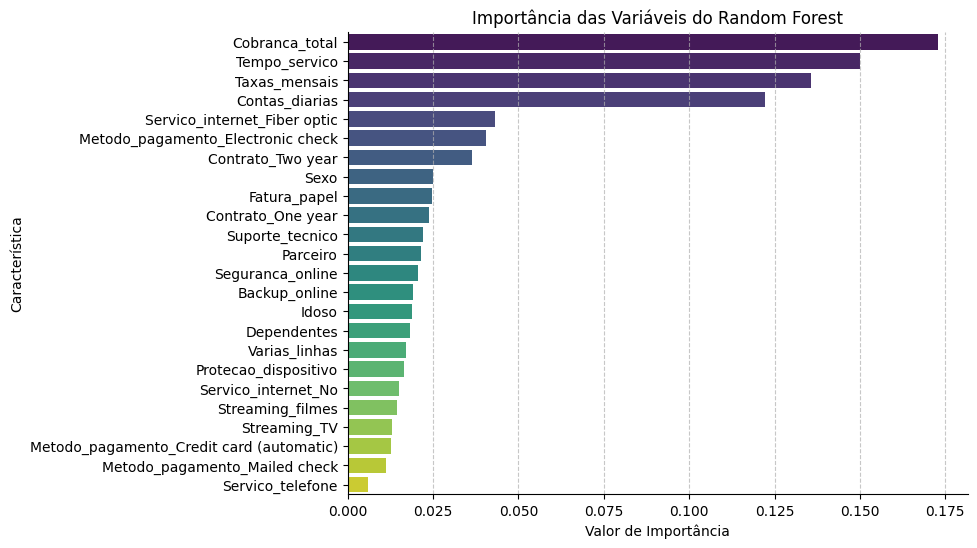

In [34]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Importância das Variáveis do Random Forest')
plt.xlabel('Valor de Importância')
plt.ylabel('Característica')
plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine()
plt.show()

**Interpretação da Importância das Variáveis:**

Valores **maiores** de **"Importance"** indicam que a variável teve um papel mais significativo na capacidade do modelo de prever o `churn`.

Variáveis como `Cobranca_total`, `Tempo_serico`, `Taxas_mensais` e `tipos de contrato` tendem a ser muito relevantes, pois são frequentemente utilizadas para dividir os dados nas árvores de decisão.



---



•	**SVM** (`Support Vector Machine`): No SVM, as variáveis mais relevantes são aquelas que influenciam a fronteira de decisão entre as classes. Você pode analisar os coeficientes dos vetores de suporte para entender quais variáveis têm maior impacto.

In [35]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Treinar o modelo SVM (com kernel linear para interpretar coeficientes)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Coeficientes do SVM Linear.
# svm_model.coef_[0] contém os coeficientes para a primeira (e única) classe positiva em uma classificação binária
coefficients_svm = pd.DataFrame({'Feature': X.columns, 'Coefficient': svm_model.coef_[0]})
coefficients_svm['Absolute_Coefficient'] = abs(coefficients_svm['Coefficient'])
coefficients_svm = coefficients_svm.sort_values(by='Absolute_Coefficient', ascending=False)

print("--- Coeficientes do SVM Linear (Maiores impactos na fronteira de decisão) ---")
print(coefficients_svm.head(24).to_string(index=False))
print("-" * 70)

--- Coeficientes do SVM Linear (Maiores impactos na fronteira de decisão) ---
                                 Feature  Coefficient  Absolute_Coefficient
            Servico_internet_Fiber optic     0.741572              0.741572
                           Tempo_servico    -0.513671              0.513671
                           Taxas_mensais    -0.304564              0.304564
                          Cobranca_total    -0.302803              0.302803
                     Servico_internet_No    -0.194134              0.194134
                        Streaming_filmes     0.145354              0.145354
                            Streaming_TV     0.141969              0.141969
                           Varias_linhas     0.136781              0.136781
                       Contrato_One year    -0.131202              0.131202
       Metodo_pagamento_Electronic check     0.126704              0.126704
                         Suporte_tecnico    -0.100208              0.100208
          

/tmp/ipython-input-3780728133.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients_svm, palette='viridis')


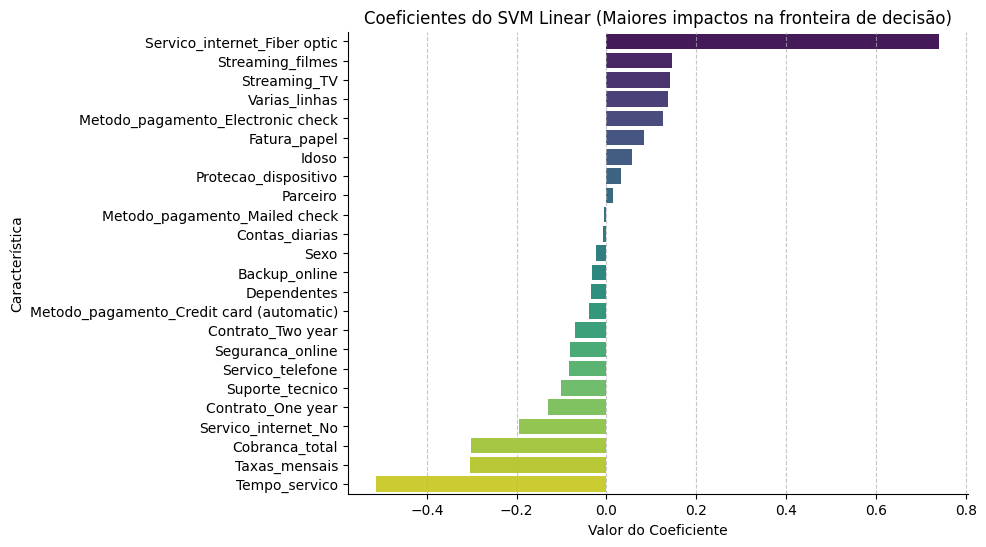

In [36]:
coefficients_svm = pd.DataFrame({'Feature': X.columns, 'Coefficient': svm_model.coef_[0]})
coefficients_svm['Absolute_Coefficient'] = abs(coefficients_svm['Coefficient'])
coefficients_svm = coefficients_svm.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_svm, palette='viridis')
plt.title('Coeficientes do SVM Linear (Maiores impactos na fronteira de decisão)')
plt.xlabel('Valor do Coeficiente')
plt.ylabel('Característica')
plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine()
plt.show()

# 📄Relatório de Análise de Evasão de Clientes (Churn) II

📄**Visão Geral**

* O objetivo deste estudo foi identificar os principais fatores que influenciam a evasão de clientes (`churn`) em uma empresa de telecomunicações e construir modelos preditivos capazes de prever a probabilidade de saída dos clientes. Foram utilizados modelos de `Regressão Logística`,` Random Forest` e `SVM`, com destaque para a interpretação dos resultados e análise de variáveis.

* O conjunto de dados contém informações de 7.267 clientes. A análise de evasão revelou um desequilíbrio significativo entre as classes, com 73,5% dos clientes não evadidos e 26,5% dos clientes evadidos.

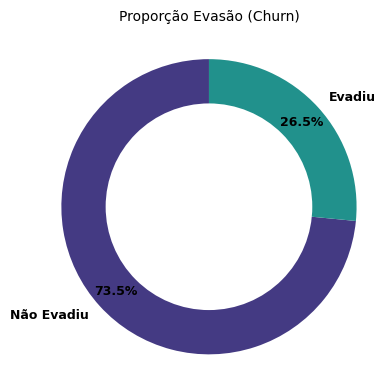

🔍 **Principais Fatores que Influenciam a Evasão**

* **Com base na Regressão Logística**, os fatores com maior impacto (coeficiente absoluto) foram:

| Variável                            | Efeito na Evasão | Interpretação                                                                |
| ----------------------------------- | ---------------- | ---------------------------------------------------------------------------- |
| **Tempo de serviço**                | Negativo         | Clientes com menos tempo de contrato têm maior chance de evadir.             |
| **Cobrança total**                  | Positivo         | Valores menores de cobrança total estão mais associados à evasão.            |
| **Contrato de dois anos**           | Negativo         | Reduz a probabilidade de churn.                                              |
| **Internet por fibra ótica**        | Positivo         | Associado a maior evasão, possivelmente por problemas de qualidade ou preço. |
| **Contrato mensal**      | Positivo         | Alta chance de churn (comparado a contratos mais longos).                    |
| **Pagamento via cheque eletrônico** | Positivo         | Associado a maior evasão, pode indicar menor estabilidade financeira.        |





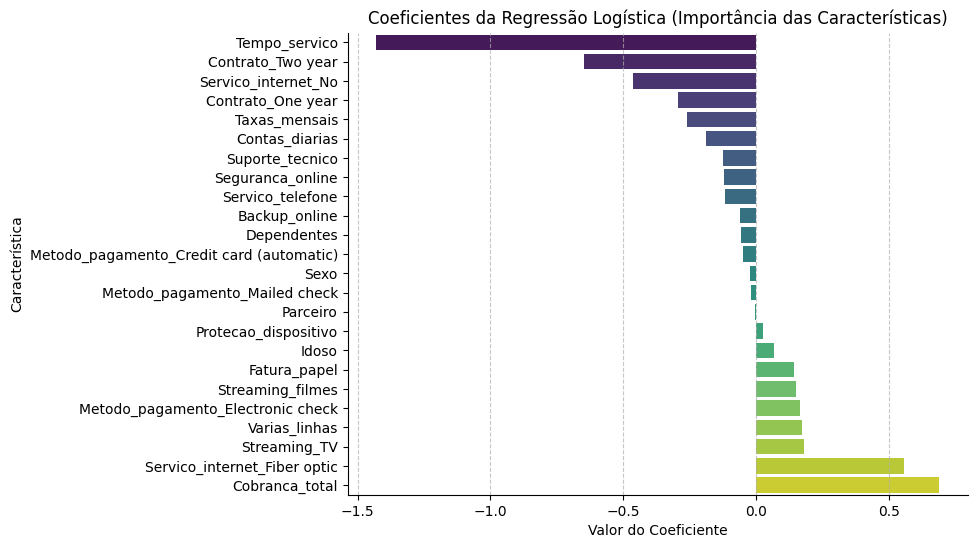


* **Com base no Random Forest**, as variáveis mais importantes foram:

| Variável             | Importância        |
| -------------------- | ------------------ |
| **Cobrança total**   | 17%                |
| **Tempo de serviço** | 15%                |
| **Taxas mensais**    | 13%                |
| **Contas diárias**   | 12%                |
| **Contrato**         | 6% (somando tipos) |


**Conclusão:** Há consenso entre os modelos de que tempo de contrato, forma de pagamento, tipo de contrato e cobrança total são os principais preditores de evasão.


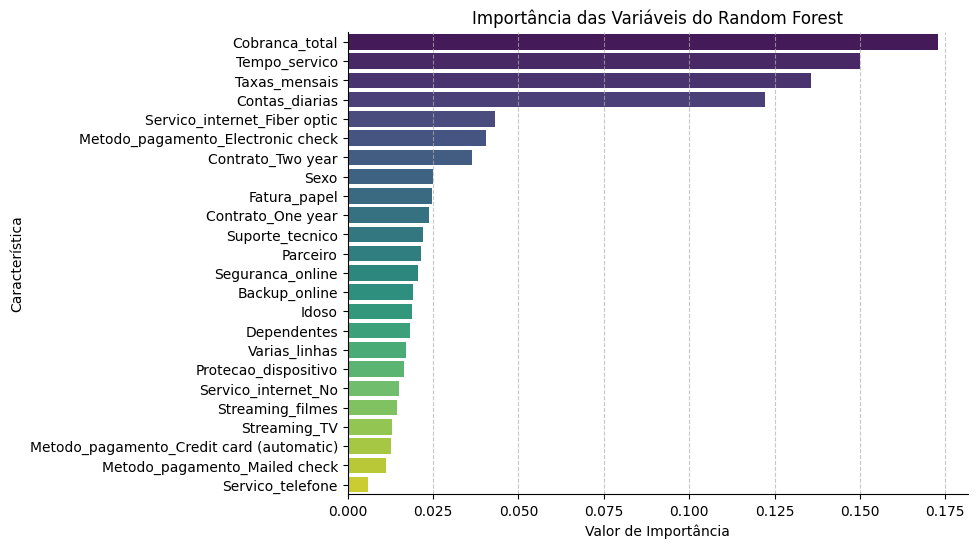

🤖 **Desempenho dos Modelos Preditivos**

| Modelo                  | Acurácia | Precisão (Evadiu) | Recall (Evadiu) | F1-score (Evadiu) |
| ----------------------- | -------- | ----------------- | --------------- | ----------------- |
| **Regressão Logística** | 80.6%    | 66.7%             | **53.6%**       | **59.4%**         |
| **Random Forest**       | 79.5%    | 65.8%             | 47.4%           | 55.1%             |


**Melhor desempenho:** A Regressão Logística apresentou melhores resultados, especialmente no recall da classe “Evadiu”, o que é essencial para estratégias de retenção.


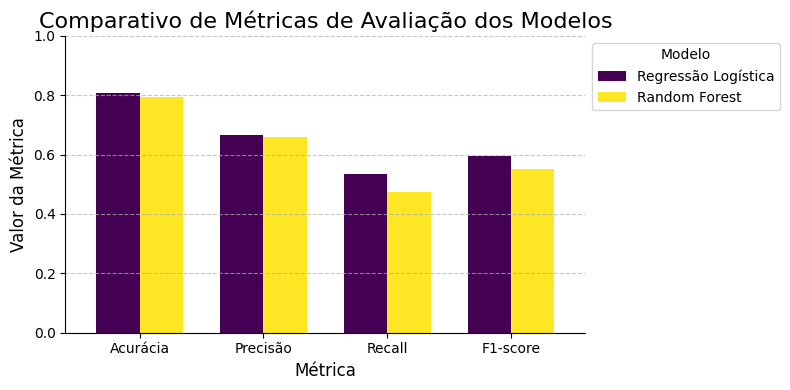

📌 **Insights Comportamentais**

* **Clientes recentes** (baixo tempo de contrato) **evadem mais**.

* Clientes com **baixa cobrança total** ou **taxas mensais elevadas** tendem a sair.

* **Contratos curtos **e **métodos de pagamento** manuais aumentam a evasão.

* Há outliers que evadem mesmo com alto tempo ou cobrança, indicando necessidade de segmentação mais refinada.

🎯 **Recomendações Estratégicas para Reduzir a Evasão**



1. Incentivar Contratos de Longo Prazo
* Oferecer descontos, benefícios exclusivos ou bônus para quem migrar para planos anuais ou bianuais.

2. Estimular Pagamentos Automáticos
* Campanhas para incentivar o uso de cartão de crédito automático, que tem associação negativa com churn.

* Evitar meios como cheque eletrônico, que estão ligados à evasão.

3. Intervenção Proativa com Novos Clientes
* Clientes com menos de 6 meses devem ser alvo de contato personalizado para garantir satisfação inicial.

4. Avaliar Qualidade da Internet por Fibra Ótica
* Alta evasão entre usuários deste serviço pode indicar problemas técnicos ou de atendimento.

* Reforçar suporte técnico e garantia de qualidade.

5. Monitorar Clientes com Baixa Cobrança Total
* Baixa cobrança pode sinalizar subutilização do serviço ou planos baratos. Avaliar cross-sell e upsell de forma estratégica.

6. Usar o Modelo Preditivo no Ciclo de Vida
* Implantar o modelo logistic_regression no CRM para identificar clientes com alto risco de churn e acionar campanhas preventivas.

✅ **Conclusão Geral**

A análise demonstrou que a evasão está fortemente relacionada a comportamentos contratuais e financeiros dos clientes. A **Regressão Logística** se mostrou o modelo mais eficiente neste contexto, sendo adequada tanto para previsão quanto para explicação interpretável dos fatores de churn.

Com ações direcionadas aos principais fatores de risco identificados, é possível **aumentar a retenção e o valor do ciclo de vida do cliente.**